<a href="https://colab.research.google.com/github/Dany511/Bike_Demand_Prediction/blob/main/Bike_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Import Libraries**

In [1]:
import pandas as pd   #Data analysis and manipulation library
import math  #Used for mathematical functions
import numpy as np  #Used for working with arrays
import seaborn as sns #Used for data visualization
import matplotlib.pyplot as plt #Used for data visualization
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder,StandardScaler # Machine learning library
from sklearn.model_selection import train_test_split
import warnings # Used to avoid warning messages
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [2]:
df=pd.read_csv("SeoulBikeData.csv",encoding= 'unicode_escape')
# .head() function gives the preview of the data
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
# Data shape
df.shape

(8760, 14)

In [4]:
# info() function is used to get information abouts the dataframe eg : Number of columns, Datatype of columns and Presence of NUll values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### There are 9 Numerical and 4 Categorical variables in the dataset

In [5]:
# Descriptive summary of the dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### For 'Rented Bike Count', 'Solar Radiation' , 'Temperature' etc the mean is greater than the median so the distribution is Right skewed and may contain Outliers. Lets check that out in the EDA part

## **Preprocessing the data**

## Check and Handle NULL values

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [6]:
# Check the Null values in the dataframe
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### There are no NULL values present in any of the columns

In [7]:
# Check duplicated values
df.duplicated().sum()

0

In [8]:
# Convert 'date' column to datetime format 
df['Date']=pd.to_datetime(df['Date'])
# Create seperate column for Day ,Month and Year
df['Day_name']=df['Date'].dt.day_name()
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [9]:
# Drop the date column 
df=df.drop('Date',axis=1)

In [10]:
# Write a function to distribute 'hour' feature
def hour(h):
  if h >= 16 and h <= 21:
    return 'Evening'
  elif h >= 7 and h <= 11:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'  

In [11]:
# Create new column with  name 'label_day_night' and the store the day and night values 
df['label_day_night']=df['Hour'].apply(hour)

## **Exploratory Data Analysis**

## Outlier Detection

### Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

In [12]:
# Make list of all numerical columns
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_columns

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

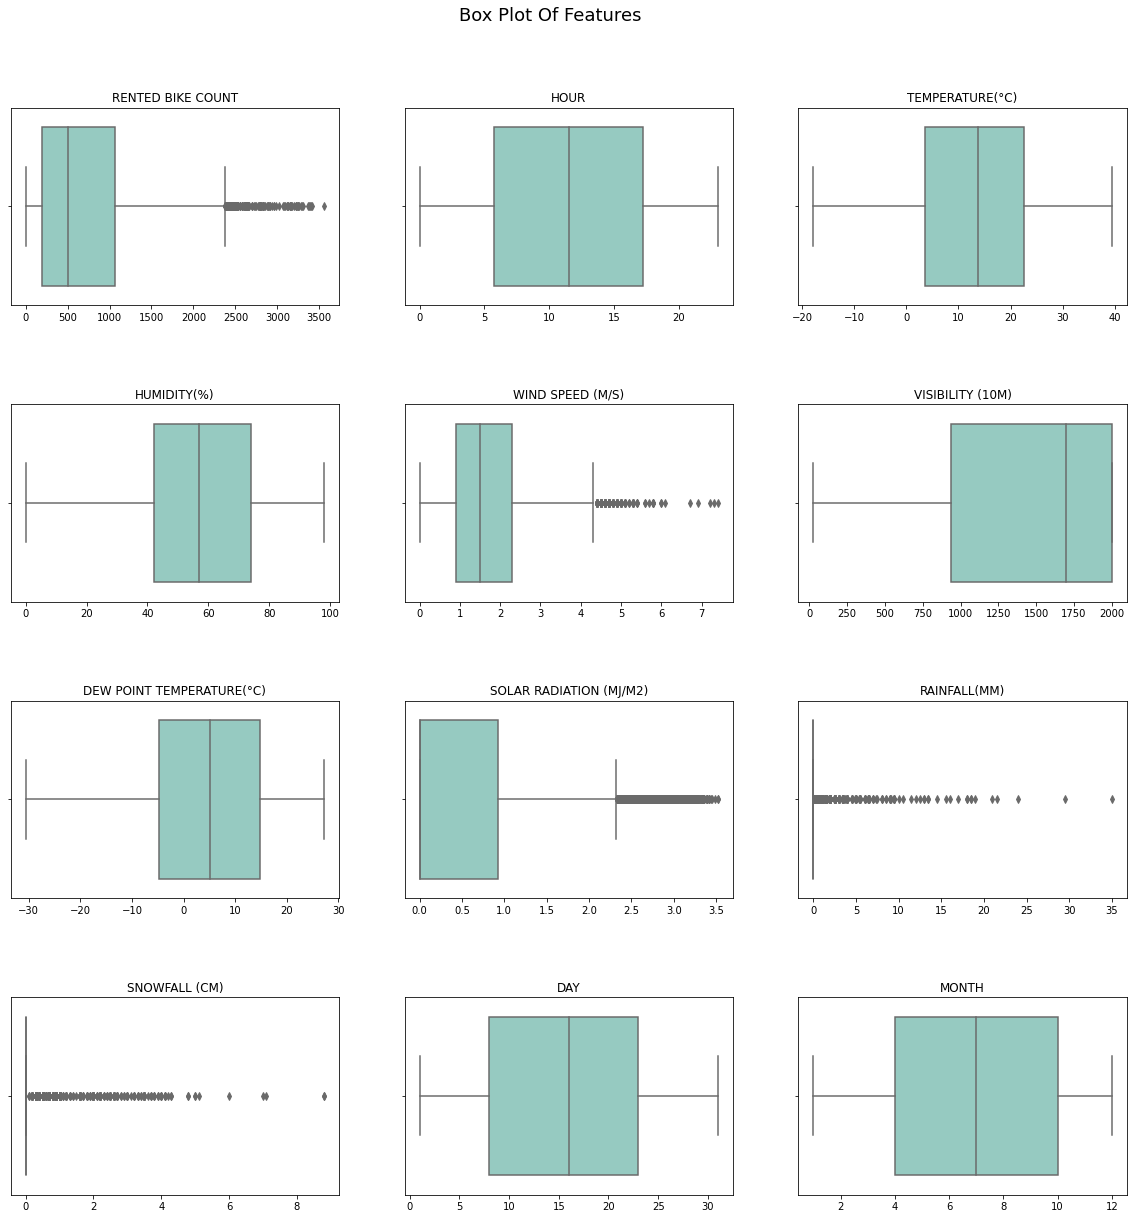

In [13]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Box Plot Of Features", fontsize=18, y=0.95)

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.boxplot(df[col],ax=ax,palette="Set3")

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

### When we observe the box plots above we can see that columns 'Rented Bike Count' , 'Wind Speed' , 'Solar Radiation' and 'Rainfall' have high values but the values may not be necessarily Outliers 

### 'Rented Bike Count' may have significantly large values when there is huge demand during office hours and  weekends

### 'Wind Speed' , 'Solar Radiation' and 'Rainfall' may have large values depending on the season. Solar Radiation can be high in Summer but low in winter. Same with case of Windspeed and Rainfall

### So I don't worry about outliers in the data

## Univariate Analysis

### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

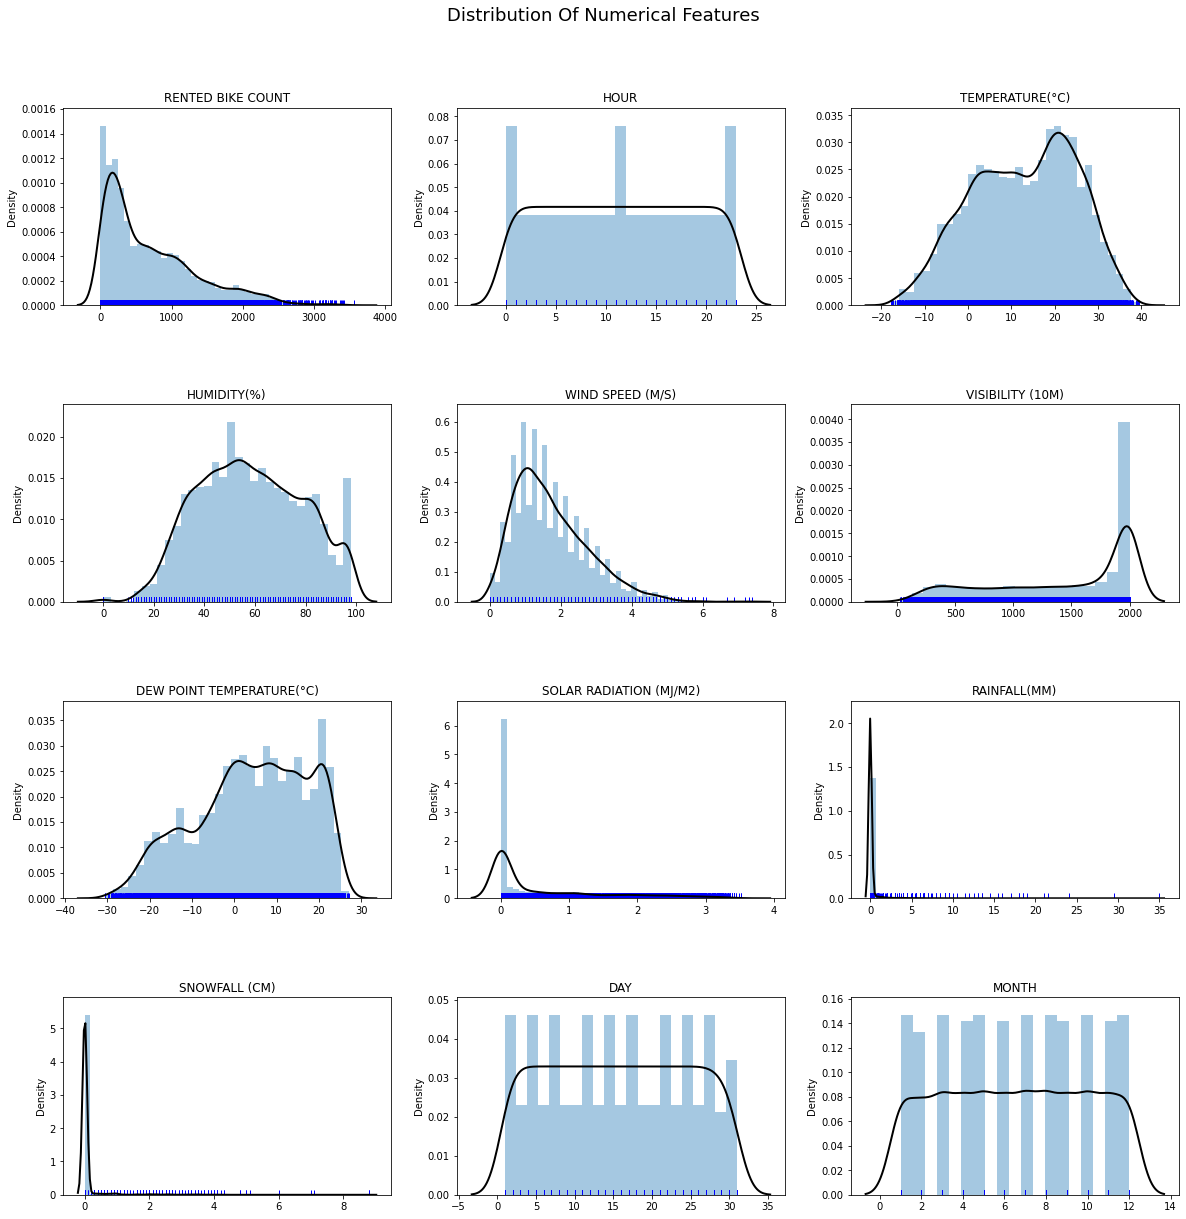

In [14]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution Of Numerical Features", fontsize=18, y=0.95)

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(x=df[col],ax=ax,rug=True, rug_kws={"color": "b"},kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

### The Distribution of 'Rented Bike Count' is Right (Positively) skewed. we will apply transformation and make the distribution close to Normal distribution

### The Distribution of Temperature, Humidity , Windspeed and Solar Radiation are pretty close to Normal distribution


## Correlation Heatmap

### Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

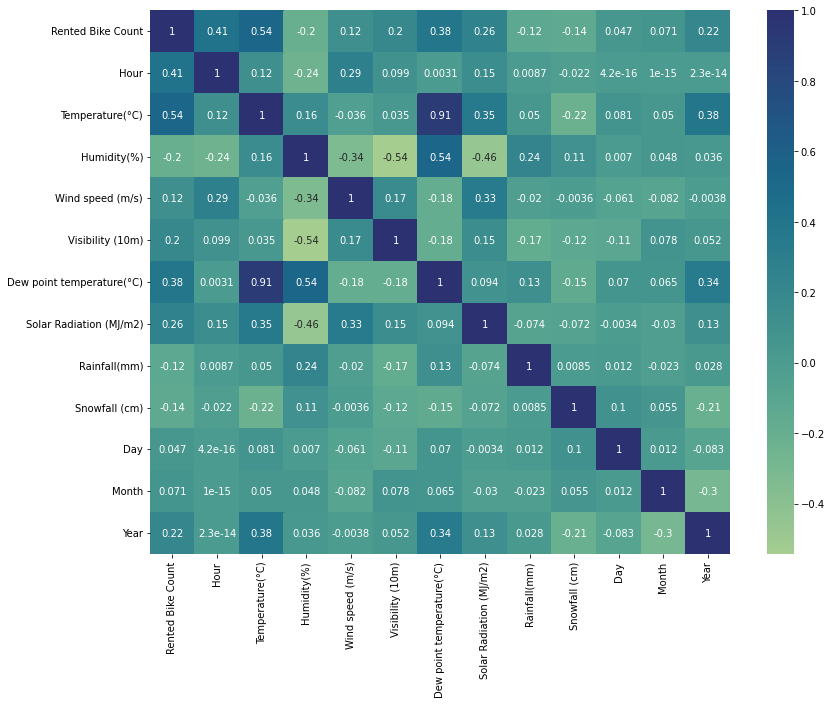

In [15]:
plt.figure(figsize=(13,10)) # Define figure size
sns.heatmap(df.corr(),annot=True,cmap='crest') # seaborn heatmap using correlation matrix
plt.show()

### From the correlation heatmap we can see that the Temperature and Dew point temperature have high correlation 0.91

### To remove multicollinearity between independent variables, I remove the Dew point temperature because it has less correlation with the dependent variable when compared with Temperature 

In [16]:
# Drop Dew point tempearture column 
df=df.drop('Dew point temperature(°C)',axis=1)

## Bivariate Analysis

### Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two variables and to what extent.

In [17]:
# create a list of features 
features=list(df.columns)[:9]

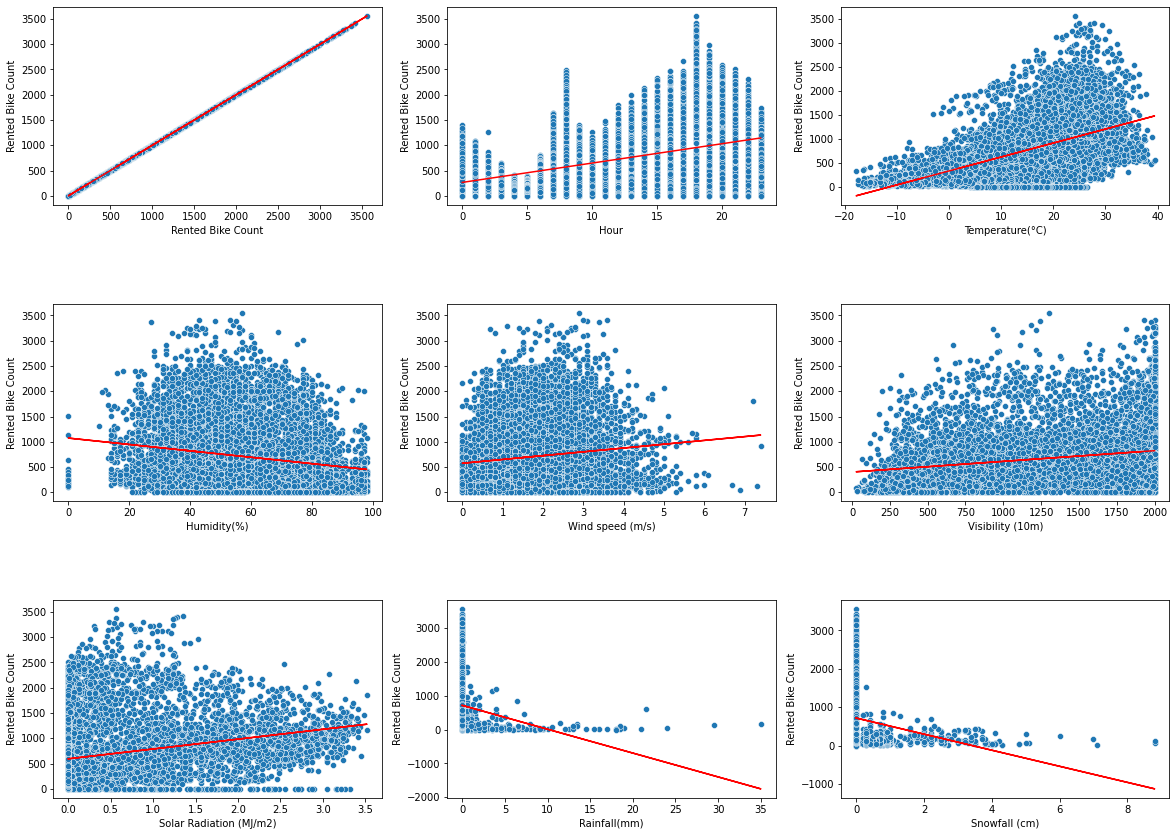

In [18]:
# Plot of Rented Bike Count vs other features
count=1 # initialize a variable
plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Scatterplots of all features", fontsize=18,y=0.95) # title of the plot
for col in features:
  plt.subplot(4,3,count)
  sns.scatterplot(df[col],df['Rented Bike Count']) # Scatterplot of Rented bike count vs other variables
  z=np.polyfit(df[col],df['Rented Bike Count'],1) # plots the trend line
  p=np.poly1d(z)
  plt.plot(df[col],p(df[col]),color="red")
  count+=1
plt.show()

### From the above regression plots we can say that some of our features are positively correlated and some of them are negatively correlated with our target variable ('Rented bike count')

In [19]:
# Correlation with Rented bike count
df.corr()['Rented Bike Count']

Rented Bike Count          1.000000
Hour                       0.410257
Temperature(°C)            0.538558
Humidity(%)               -0.199780
Wind speed (m/s)           0.121108
Visibility (10m)           0.199280
Solar Radiation (MJ/m2)    0.261837
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Day                        0.046849
Month                      0.070861
Year                       0.215162
Name: Rented Bike Count, dtype: float64

##  Hour , Temperature , Wind speed , Visibility , Solar Radiation are positively correlated with our target variable

## Humidity , Rainfall and Snowfall are negatively correlated

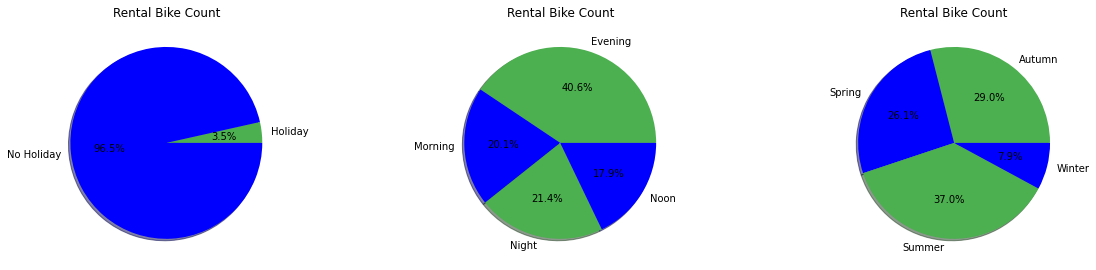

In [20]:
# Plot the distribution of Percentage of Rented bike count for all the categorical variables
Categorical_features=["Holiday",'label_day_night','Seasons'] # Make list of categorical columns
n=1
plt.figure(figsize=(20,15))
for i in Categorical_features: # Iterate through each feature
  plt.subplot(3,3,n)
  n=n+1
  plt.title('Rental Bike Count') # Give a Title
  data=df.groupby(i)['Rented Bike Count'].sum()
  plt.pie(data,labels = data.keys().tolist(),shadow=True,colors=['#4CAF50','B'],autopct='%1.1f%%') # Pie plot
plt.show()

### Demand for Bikes is high on working days and low during holidays.This may be bacause of the people who use bikes to go to their work 

### As we see above demand is high in summer which is 37% followed by  Autumn 29.0% , spring 26.1% and Winter 7.9%

### Demand for bikes is high during evening from 16.00 hrs to 21.00 hrs and also in the morning during 8.00 hrs to 11.00 hrs

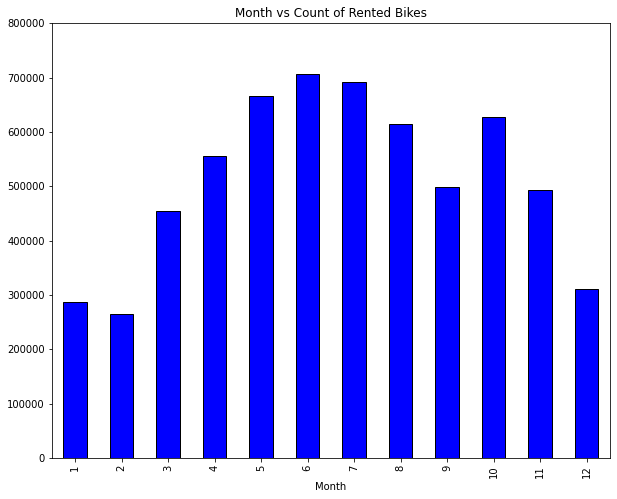

In [21]:
# Total Rented Bikes per each month
plt.figure(figsize=(10,8))
plt.title('Month vs Count of Rented Bikes')
plt.style.use('classic')
df.groupby('Month')['Rented Bike Count'].sum().plot(kind='bar',x='Month',y='Rented_Bikes') # bar plot of number of rented bikes per month

### In the month column we can see that demand is high in May, June and July during summer and low in December, January and february

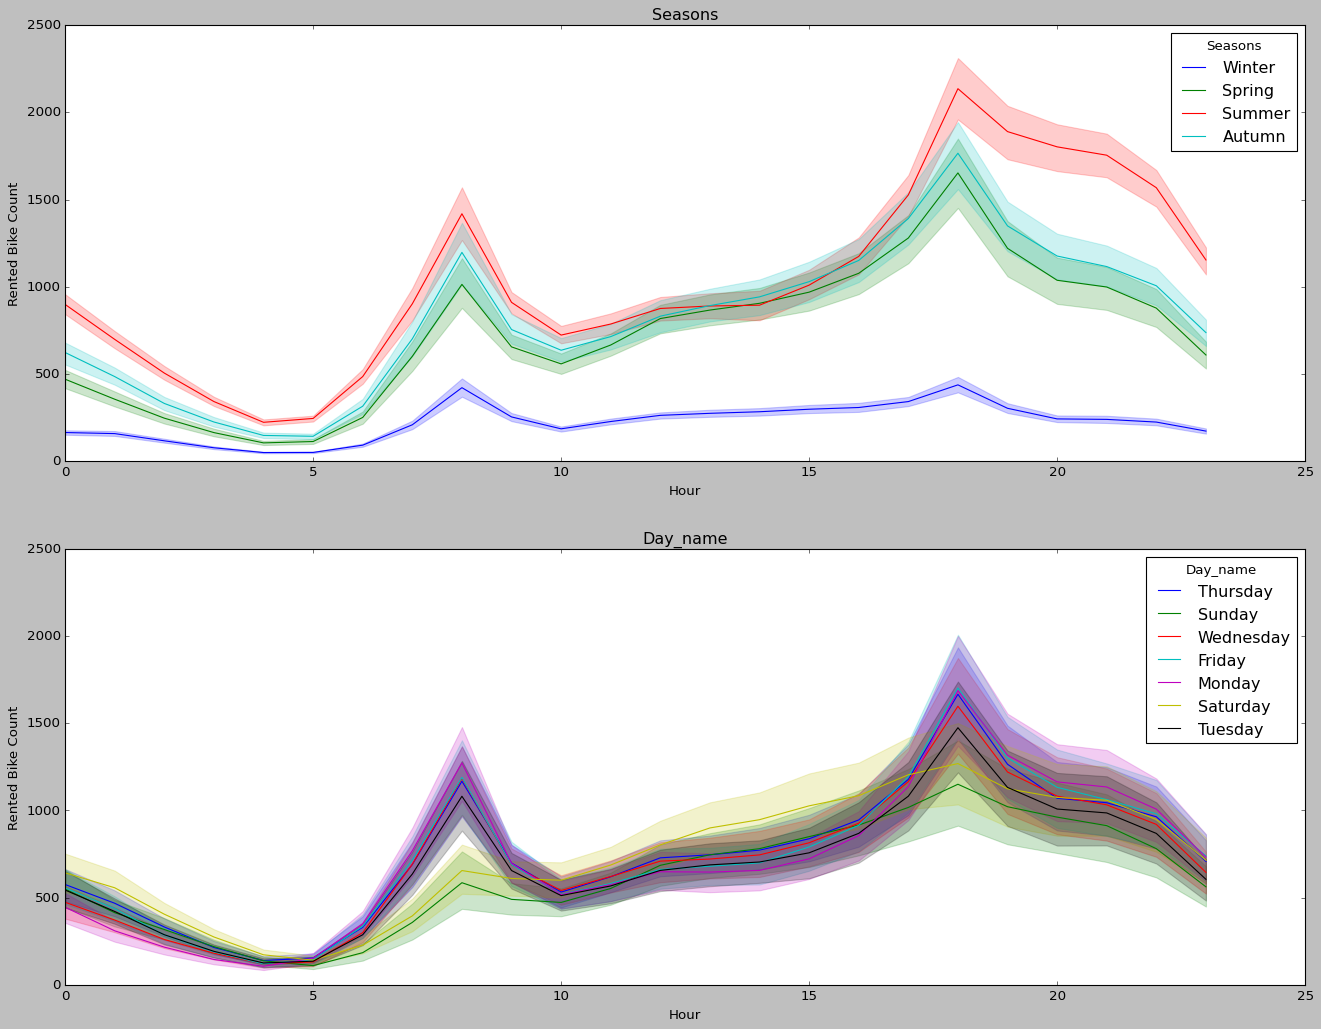

In [22]:
features=["Seasons","Day_name"]
n=1
plt.figure(figsize=(20,15))
for i in features: # Iterate through each feature
  plt.subplot(2,1,n)
  n=n+1
  plt.title(i)
  sns.lineplot(data=df,x='Hour',y='Rented Bike Count',hue=df[i])
plt.show()

### The demand is high at 8'o clock in the morning and 6'o clock in the evening this may be because of employees who go to work in the morning and return from work in the evening 

### Demand is high during weekdays at office hours(8.00 AM and 6.00 pM)but during weekends demand is more during 12.00 to 15.00 hrs when compared to weekdays



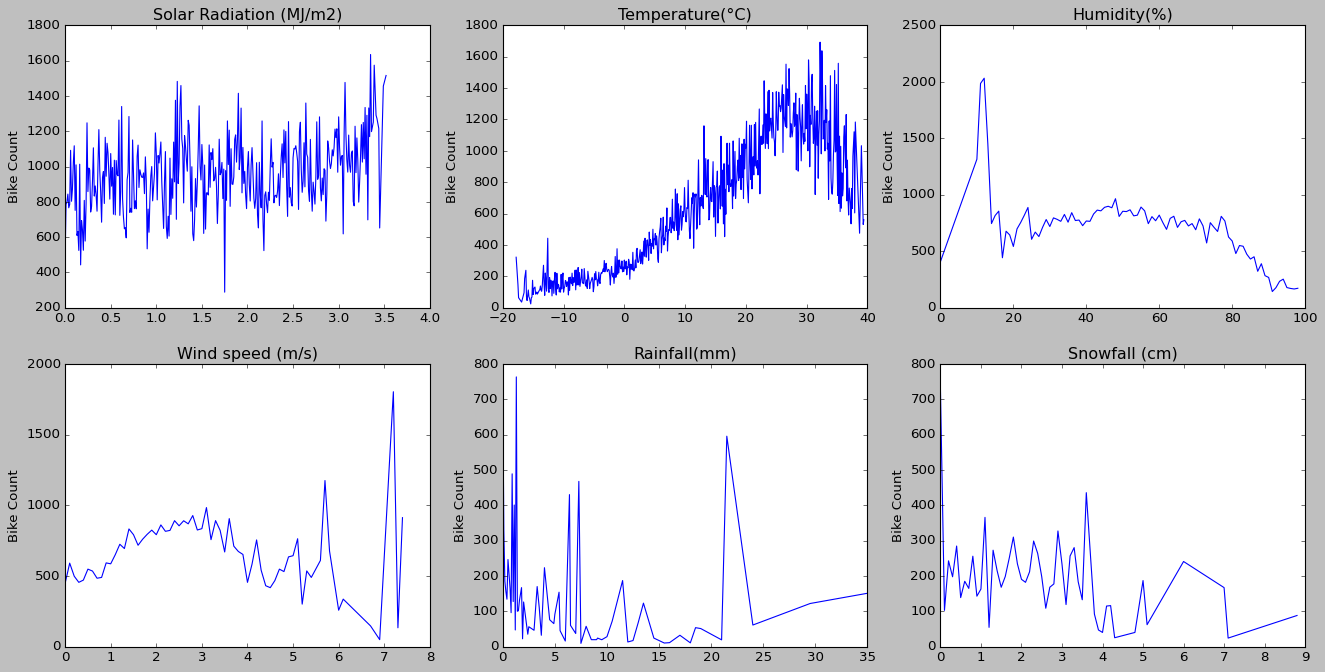

In [23]:
# Plot of Rented bike count vs weather
Weather_features=["Solar Radiation (MJ/m2)",'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)','Rainfall(mm)', 'Snowfall (cm)'] # Make list of weather related columns
n=1
plt.figure(figsize=(20,15))
for i in Weather_features: # Iterate through each feature
  plt.subplot(3,3,n)
  n=n+1
  plt.ylabel('Bike Count') 
  plt.title(i) # Give a Title
  data=df.groupby(i).mean()['Rented Bike Count']
  plt.plot(data)
plt.show()

### We see a slightly increasing trend in the above plot. This shows that Rented Bike Count and Solar Radiation are positively correlated. This may be due to the peak demand for bikes during 15.00 hrs to 20.00 hrs

### From the above we can see that in general, more people tend to prefer biking at moderate to high temperatures: however if the temperature is too hot( T > 35°C) there is a small decline in the demand

### Generally people rent bike when there is no rainfall, The peak at 23mm occured may be because of the sudden change in weather with heavy rainfall in the same hour 

### From the plot we can see that people prefer to rent bike when the whether is clear and sunny with no snowfall

## **Feature Engineering**

### Label encoding is converting categorical features to numerical features so as to convert them into machine readable form

In [24]:
# Encoding categorical columns 'Holiday' and 'Functioning Day' with Labelencoder
le=LabelEncoder() # create a object of label encoder
df['Holiday']=le.fit_transform(df['Holiday'])
df['Functioning Day']=le.fit_transform(df['Functioning Day'])
df['Year']=le.fit_transform(df['Year']) 

In [25]:
# Create dummies for "Seasons" column
seasons_day=pd.get_dummies(df[['Seasons','Day_name']])
df=pd.concat([df.drop(['Seasons'],axis=1),seasons_day],axis=1) # Add the dummies to the dataset using concat function

In [26]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Seasons_Spring Seasons_Summer  Seasons_Winter  \
0        1  ...               0              0               1   
1        1  ...               0              0               1   
2        1  ...               0              0               1   
3        1  ...               0              0               1   
4        1  ...               0              0               1   

   Day_name_Friday  Day_name_Monday Day_name_Saturday  Day_name_Sunday  \
0                0                0                 0                0   
1                0                0                 0                0   
2                0                0                 0                0   
3                0                0                 0                0   
4                0                0                 0                0   

   Day_name_Thursday  Day_name_Tuesday  Day_name_Wednesday  
0                  1                 0                   0  
1                  1                 0                   0  
2                  1                 0                   0  
3                  1                 0                   0  
4                  1                 0                   0  

[5 rows x 27 columns]

## Transformations on Rented bike count

### Previously we saw that our dependent variable ie Rented bike count is right skewed. Now we will try some transformation and make it as close to Normal distribution

Text(0.5, 1.0, 'Square root')

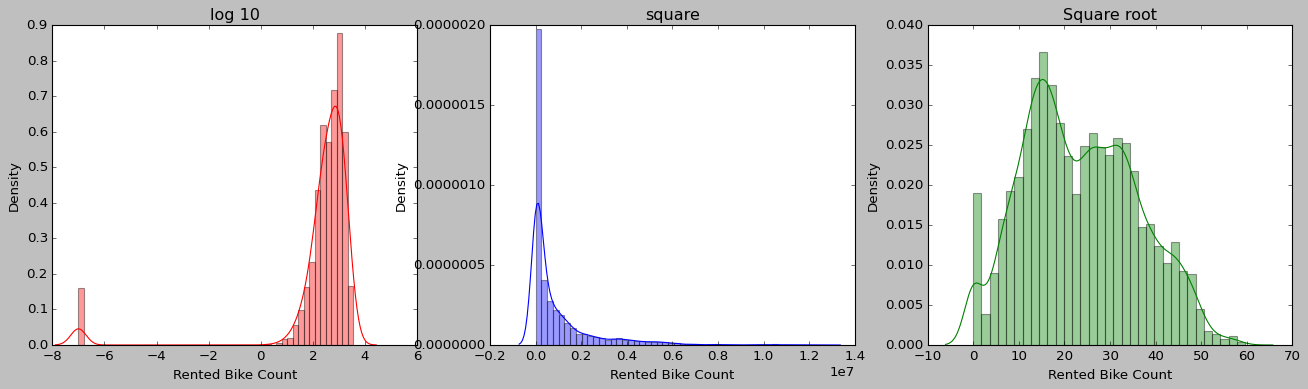

In [27]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# use log10 
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# use square 
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='b').set_title("square")
# use square root 
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

### After the square root transformation the data in the 3rd plot is normalized to some extent. So we will choose square root transformation

In [28]:
# Apply square root transformation and store the values in y
y=(df['Rented Bike Count'])**0.5

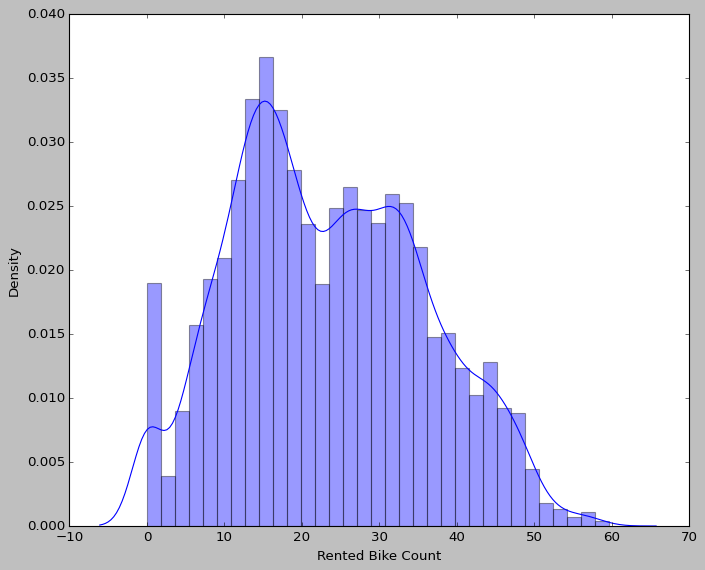

In [29]:
# Distrbution plot of y
plt.figure(figsize=(10,8))
sns.distplot(y)

In [30]:
# Columns
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Day_name', 'Day', 'Month', 'Year', 'label_day_night', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Day_name_Friday',
       'Day_name_Monday', 'Day_name_Saturday', 'Day_name_Sunday',
       'Day_name_Thursday', 'Day_name_Tuesday', 'Day_name_Wednesday'],
      dtype='object')

In [31]:
# Selecting the features for creating a model
features=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Month', 'Year', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Day_name_Friday',
       'Day_name_Monday', 'Day_name_Saturday', 'Day_name_Sunday',
       'Day_name_Thursday', 'Day_name_Tuesday', 'Day_name_Wednesday']

In [32]:
# Create a dataframe X with appropriate features
x=df[features]

In [33]:
x.head(10)

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   
5     5             -6.4           37               1.5              2000   
6     6             -6.6           35               1.3              2000   
7     7             -7.4           38               0.9              2000   
8     8             -7.6           37               1.1              2000   
9     9             -6.5           27               0.5              1928   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                     0.00           0.0            0.0        1   
1                     0.00           0.0            0.0        1   
2                     0.00           0.0            0.0        1   
3                     0.00           0.0            0.0        1   
4                     0.00           0.0            0.0        1   
5                     0.00           0.0            0.0        1   
6                     0.00           0.0            0.0        1   
7                     0.00           0.0            0.0        1   
8                     0.01           0.0            0.0        1   
9                     0.23           0.0            0.0        1   

   Functioning Day  ...  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0                1  ...               0               0               1   
1                1  ...               0               0               1   
2                1  ...               0               0               1   
3                1  ...               0               0               1   
4                1  ...               0               0               1   
5                1  ...               0               0               1   
6                1  ...               0               0               1   
7                1  ...               0               0               1   
8                1  ...               0               0               1   
9                1  ...               0               0               1   

   Day_name_Friday  Day_name_Monday  Day_name_Saturday  Day_name_Sunday  \
0                0                0                  0                0   
1                0                0                  0                0   
2                0                0                  0                0   
3                0                0                  0                0   
4                0                0                  0                0   
5                0                0                  0                0   
6                0                0                  0                0   
7                0                0                  0                0   
8                0                0                  0                0   
9                0                0                  0                0   

   Day_name_Thursday  Day_name_Tuesday  Day_name_Wednesday  
0                  1                 0                   0  
1                  1                 0                   0  
2                  1                 0                   0  
3                  1                 0                   0  
4                  1                 0                   0  
5                  1                 0                   0  
6                  1                 0                   0  
7                  1                 0                   0  
8                  1                 0                   0  
9                  1                 0                   0  

[10 rows x 23 columns]

## **Standardization**

### Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [34]:
# Apply Standardization on X
sc=StandardScaler() # Create object for standardscaler
X=sc.fit_transform(x)

## **Model Building**

In [35]:
# Split the data 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23) # Training data : 80% , Test Data : 20%

In [36]:
x_test.shape

(1752, 23)

In [37]:
# Import all the models from sklearn library
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_regression=LinearRegression()
# Create an object for each model
lasso=Lasso()
ridge=Ridge()
DecisionTree=DecisionTreeRegressor()
RandomForest=RandomForestRegressor()
# Create a list of model objects
Models=[lasso,ridge,DecisionTree,RandomForest]

In [38]:
# Import all neccessary metrics
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
linear_regression.fit(x_train,y_train) # fit linear_regression model to training data
predictions=linear_regression.predict(x_test) # Predict the count of bikes

In [40]:
print("Linear Regression")
print("*"*100)
training_score=linear_regression.score(x_train,y_train)
print("Training_r2_score = ",training_score)
rmse=math.sqrt(mean_squared_error(y_test,predictions))
print("Root_Mean_Squared_Error = ", rmse)
mse=mean_squared_error(y_test,predictions)
print("Mean_Squared_Error = ",mse)
r2=r2_score(y_test,predictions)
print("R-Squared = ",r2)
adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_R2 = ",adj_r2)

Linear Regression
****************************************************************************************************
Training_r2_score =  0.6564367793934631
Root_Mean_Squared_Error =  7.286036566385434
Mean_Squared_Error =  53.08632884670564
R-Squared =  0.6524835592012341
Adjusted_R2 =  0.6478580510193062


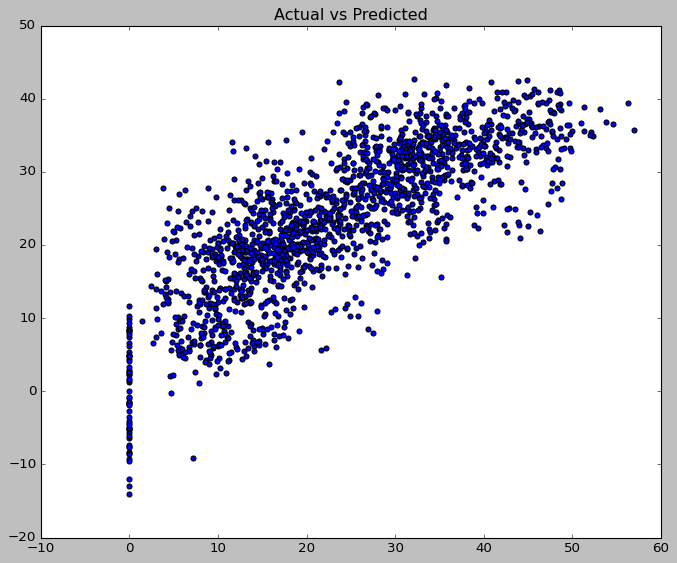

In [41]:
# Plot of Actual vs Predicted values
plt.figure(figsize=(10,8))
plt.title("Actual vs Predicted")
plt.scatter(y_test,predictions)

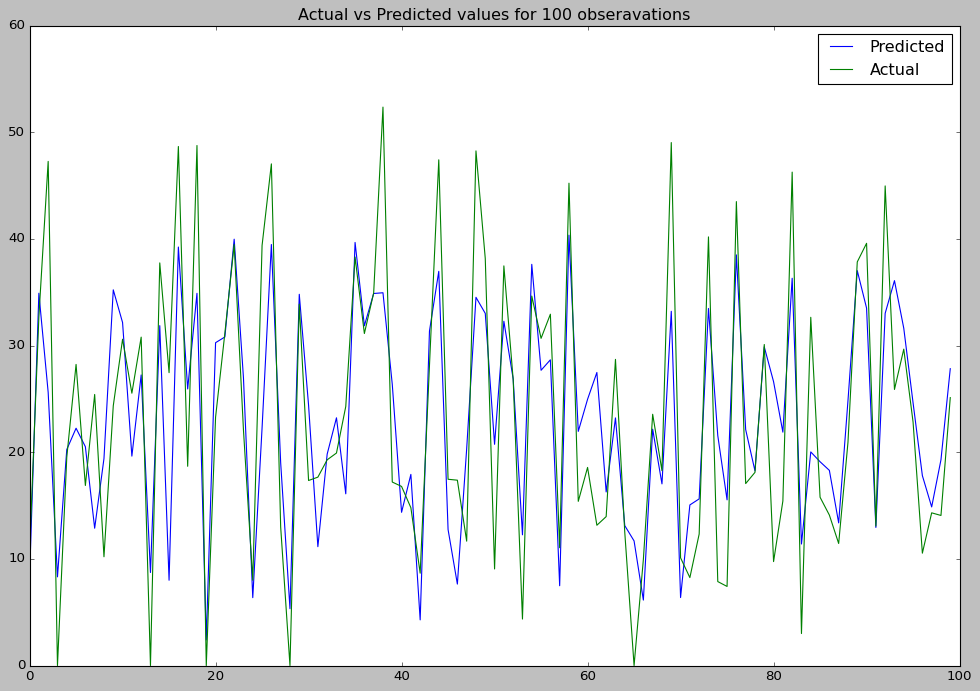

In [42]:
# Plot Actual vs Predictions
plt.figure(figsize=(15,10))
plt.plot(predictions[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.title("Actual vs Predicted values for 100 obseravations")
plt.show()

### The linear regression model is performing good, As there's a strong correlation between the model's predictions and the actual values.
### But when we see the plot of Actual vs Predicted values we can observe that the model is not able to capture the variance and hidden patterns in data effectively 
### So we can try different models to get better R-Squared score and Root mean squared error 

In [43]:
# Make separate empty lists for all the evaluation metrics
Training_Score=[] 
RMSE=[]
MSE=[]
R2=[]
Adj_R2=[]

In [44]:
# Append metrics for linear_regression
MSE.append(mse)
RMSE.append(rmse)
Training_Score.append(training_score)
R2.append(r2)
Adj_R2.append(adj_r2)

In [45]:
# Function to train and test the model
def train_predict(model):
  Model=model.fit(x_train,y_train) #fit the model
  print(Model)
  print('\n')

  training_score=model.score(x_train,y_train) #r2_score for training
  print("Training_r2_score = ",training_score)

  if model==DecisionTree or model==RandomForest:
     importances=model.feature_importances_   #Feature importances
     print('Feature Importances ' ,importances)
     for i,v in zip(features,importances):
       print(i, " : " , v)
  else :
     coefficients=model.coef_                 #Model coefficients
     print('Coefficients ',coefficients)
     print("Model_Intercept : ",model.intercept_)
     for i,v in zip(features,coefficients):
       print(i, " : " , v)
  print('\n')
  predictions=model.predict(x_test) 
  print("Test Results ---------------------------")

  rmse=math.sqrt(mean_squared_error(y_test,predictions))
  print("Root_Mean_Squared_Error = ", rmse)
  mse=mean_squared_error(y_test,predictions)
  print("Mean_Squared_Error = ",mse)
  r2=r2_score(y_test,predictions)
  print("R-Squared = ",r2)
  adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print("Adjusted_R2 = ",adj_r2)
  print('-'*150)
  print('\n')
  # Append the all the metrics 
  MSE.append(mse)
  RMSE.append(rmse)
  Training_Score.append(training_score)
  R2.append(r2)
  Adj_R2.append(adj_r2)

In [46]:
# Create an object for each model
lasso=Lasso()
ridge=Ridge()
DecisionTree=DecisionTreeRegressor()
RandomForest=RandomForestRegressor()
# Create a list of model objects
Models=[lasso,ridge,DecisionTree,RandomForest]

## **Training and Evaluation**

In [47]:
# Iterate through each model and train
for model in Models:
   train_predict(model)

Lasso()


Training_r2_score =  0.6091908690963632
Coefficients  [ 2.7777605   4.54276963 -2.0676991   0.          0.          0.
 -0.88719055 -0.          0.          3.815955    0.          0.
  0.24008416 -0.          0.         -1.87866538  0.          0.
  0.         -0.          0.         -0.          0.        ]
Model_Intercept :  23.466005206621908
Hour  :  2.7777604995195313
Temperature(°C)  :  4.542769625999416
Humidity(%)  :  -2.0676991026859586
Wind speed (m/s)  :  0.0
Visibility (10m)  :  0.0
Solar Radiation (MJ/m2)  :  0.0
Rainfall(mm)  :  -0.8871905482376556
Snowfall (cm)  :  -0.0
Holiday  :  0.0
Functioning Day  :  3.815955002516731
Month  :  0.0
Year  :  0.0
Seasons_Autumn  :  0.24008415865707494
Seasons_Spring  :  -0.0
Seasons_Summer  :  0.0
Seasons_Winter  :  -1.8786653788862182
Day_name_Friday  :  0.0
Day_name_Monday  :  0.0
Day_name_Saturday  :  0.0
Day_name_Sunday  :  -0.0
Day_name_Thursday  :  0.0
Day_name_Tuesday  :  -0.0
Day_name_Wednesday  :  0.0


Test Result

### • The R-squared score of Lasso regression is 0.61 which is less than that of linear regression this is because of the shriking of the coefficients. Lasso regression performs feature selection by shriking the coefficients of some features all the way to '0'. There by reduces R-Squared score

### • Ridge regression has performed similar to linear regression with almost same scores

### • Clearly we can see that the tree type models are dominating the linear models here. The Training R-squared score of Decision tree is 1, whereas the test R-squared is 0.82. But here we can see that the DecisionTree is overfitting the data.

### • RandomForest is performing very well with Training R2_score of 0.98 and  Test R2_score of 0.92.

## **Metrics**

In [48]:
#list of all model names
models=['Linear','Lasso','Ridge','Decision_Tree','Random_Forest']
#creating dictionary to store all the metrics
all_metrics={'Training_score':Training_Score,'Mean_square_error':MSE,'Root_Mean_square_error':RMSE,'R_Squared':R2,'Adjusted_R_Squared':Adj_R2}

In [49]:
#converting dictionary to dataframe fro easy visual
metrics_df=pd.DataFrame.from_dict(all_metrics,orient='index',columns=models)
metrics=metrics_df.T
metrics

Training_score  Mean_square_error  Root_Mean_square_error  \
Linear               0.656437          53.086329                7.286037   
Lasso                0.609191          58.833721                7.670314   
Ridge                0.656438          53.088690                7.286199   
Decision_Tree        1.000000          26.850293                5.181727   
Random_Forest        0.989148          12.748449                3.570497   

               R_Squared  Adjusted_R_Squared  
Linear          0.652484            0.647858  
Lasso           0.614860            0.609733  
Ridge           0.652468            0.647842  
Decision_Tree   0.824231            0.821892  
Random_Forest   0.916545            0.915435

### Now Let's perform Hyperparameter Tuning and Save the best model

# **Hyperparameter Tuning**

In [50]:
# Import Gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# Declaring parameters for all the models
lasso_params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.05,0.04,0.03,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
ridge_params = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
decisiontree_params = {'criterion' : ["mse"],'splitter' : ["best", "random"],'max_depth' : [10,15,20],'min_samples_split': [10,50,100],'max_features':[6,8,12,18]}
randomforest_params = {"n_estimators":[150,200,250],
              'max_depth' : [15,20,25,30],
              'min_samples_split': [10,50,100],
              'max_features':[6,8,12,18]}


In [51]:
# Create a list of parameters for all the models
parameters=[lasso_params,ridge_params,decisiontree_params,randomforest_params]

In [52]:
# Create lists for every metrics for tuned models
Training_Score=[]
RMSE=[]
MSE=[]
R2=[]
Adj_R2=[]

## **RandomizedSearchCV**

In [53]:
def tuned(model,parameters):
  # cv=[5,6,8]
  tuned=RandomizedSearchCV(model, parameters, cv=6,scoring='r2') # Using Gridsearchcv with 5-fold cross validation with scoring as R-squared
  print(model)
  print('\n')
  tuned.fit(x_train,y_train)
  best_model=tuned.best_estimator_  # Save the best model which gives best R-squared value
  params=tuned.best_params_
  print("Best_Estimator : ",best_model)
  print("Best_Parameters : ",params)
  best_model.fit(x_train,y_train)
  training_score=best_model.score(x_train,y_train)
  print("Training_r2_score = ",training_score)
  print('\n')
  if model== DecisionTree or model== RandomForest:
      importances=model.feature_importances_
      print('\n')
      print('Feature_importances')
      for i,v in zip(features,importances):
       print(i, " : " , v)
      
  else :
      coefficients=best_model.coef_
      print('Coefficients')
      print('\n')
      for i,v in zip(features,coefficients):
       print(i, " : " , v)
      print("Model_Intercept : ",best_model.intercept_)
  print('\n')
  predictions=best_model.predict(x_test)
  print("Test Results ---------------------------")
  
  
  rmse=math.sqrt(mean_squared_error(y_test,predictions))
  print("Root_Mean_Squared_Error = ", rmse)
  mse=mean_squared_error(y_test,predictions)
  print("Mean_Squared_Error = ",mse)
  r2=r2_score(y_test,predictions)
  print("R-Squared = ",r2)
  adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print("Adjusted_R2 = ",adj_r2)
  print('*'*150)

  # Append all the metrics 
  MSE.append(mse)
  RMSE.append(rmse)
  Training_Score.append(training_score)
  R2.append(r2)
  Adj_R2.append(adj_r2)

In [54]:
# Iterate through each model and parameters
for model,params in zip(Models,parameters):
  tuned(model,params)

Lasso()


Best_Estimator :  Lasso(alpha=0.03)
Best_Parameters :  {'alpha': 0.03}
Training_r2_score =  0.6562828373413637


Coefficients


Hour  :  3.3753063427704566
Temperature(°C)  :  5.559952554254546
Humidity(%)  :  -3.338330072473085
Wind speed (m/s)  :  0.08311439988343236
Visibility (10m)  :  0.011628429925951962
Solar Radiation (MJ/m2)  :  -0.6474877603649396
Rainfall(mm)  :  -1.613787724439383
Snowfall (cm)  :  -0.021855638905064218
Holiday  :  0.6538771378788085
Functioning Day  :  5.073289138887107
Month  :  0.0
Year  :  -0.6002818617828403
Seasons_Autumn  :  1.3830941069287035
Seasons_Spring  :  -0.0024981538909847616
Seasons_Summer  :  0.069985119546432
Seasons_Winter  :  -2.5181570942041285
Day_name_Friday  :  0.07017164351340006
Day_name_Monday  :  0.0548126459174402
Day_name_Saturday  :  -0.0
Day_name_Sunday  :  -0.4203985170872288
Day_name_Thursday  :  0.0
Day_name_Tuesday  :  -0.13423055557137148
Day_name_Wednesday  :  0.0
Model_Intercept :  23.464395224111403


Test 

In [55]:
# Install Scikit-optimize library 
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.0 MB/s 


## **BayesSearchCV**

In [56]:
from skopt import BayesSearchCV
def tuned(model,parameters):
  # cv=[5,6,8]
  tuned=BayesSearchCV(model, parameters, cv=6,scoring='r2') # Using Gridsearchcv with 5-fold cross validation with scoring as R-squared
  print(model)
  print('\n')
  tuned.fit(x_train,y_train)
  best_model=tuned.best_estimator_  # Save the best model which gives best R-squared value
  params=tuned.best_params_
  print("Best_Estimator : ",best_model)
  print("Best_Parameters : ",params)
  best_model.fit(x_train,y_train)
  training_score=best_model.score(x_train,y_train)
  print("Training_r2_score = ",training_score)
  print('\n')
  if model== DecisionTree or model== RandomForest:
      importances=model.feature_importances_
      print('\n')
      print('Feature_importances')
      for i,v in zip(features,importances):
       print(i, " : " , v)
      
  else :
      coefficients=best_model.coef_
      print('Coefficients')
      print('\n')
      for i,v in zip(features,coefficients):
       print(i, " : " , v)
      print("Model_Intercept : ",best_model.intercept_)
  print('\n')
  predictions=best_model.predict(x_test)
  print("Test Results ---------------------------")
  
  
  rmse=math.sqrt(mean_squared_error(y_test,predictions))
  print("Root_Mean_Squared_Error = ", rmse)
  mse=mean_squared_error(y_test,predictions)
  print("Mean_Squared_Error = ",mse)
  r2=r2_score(y_test,predictions)
  print("R-Squared = ",r2)
  adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print("Adjusted_R2 = ",adj_r2)
  print('*'*150)

  # Append all the metrics 
  MSE.append(mse)
  RMSE.append(rmse)
  Training_Score.append(training_score)
  R2.append(r2)
  Adj_R2.append(adj_r2)

In [57]:
# Iterate through each model and parameters
for model,params in zip(Models,parameters):
  tuned(model,params)

Lasso()


Best_Estimator :  Lasso(alpha=0.03)
Best_Parameters :  OrderedDict([('alpha', 0.03)])
Training_r2_score =  0.6562828373413637


Coefficients


Hour  :  3.3753063427704566
Temperature(°C)  :  5.559952554254546
Humidity(%)  :  -3.338330072473085
Wind speed (m/s)  :  0.08311439988343236
Visibility (10m)  :  0.011628429925951962
Solar Radiation (MJ/m2)  :  -0.6474877603649396
Rainfall(mm)  :  -1.613787724439383
Snowfall (cm)  :  -0.021855638905064218
Holiday  :  0.6538771378788085
Functioning Day  :  5.073289138887107
Month  :  0.0
Year  :  -0.6002818617828403
Seasons_Autumn  :  1.3830941069287035
Seasons_Spring  :  -0.0024981538909847616
Seasons_Summer  :  0.069985119546432
Seasons_Winter  :  -2.5181570942041285
Day_name_Friday  :  0.07017164351340006
Day_name_Monday  :  0.0548126459174402
Day_name_Saturday  :  -0.0
Day_name_Sunday  :  -0.4203985170872288
Day_name_Thursday  :  0.0
Day_name_Tuesday  :  -0.13423055557137148
Day_name_Wednesday  :  0.0
Model_Intercept :  23.46439522

## GridSearchCV

In [58]:
def tuned(model,parameters):
  # cv=[5,6,8]
  tuned=GridSearchCV(model, parameters, cv=6,scoring='neg_mean_squared_error') # Using Gridsearchcv with 5-fold cross validation with scoring as R-squared
  print(model)
  print('\n')
  tuned.fit(x_train,y_train)
  best_model=tuned.best_estimator_  # Save the best model which gives best R-squared value
  params=tuned.best_params_
  print("Best_Estimator : ",best_model)
  print("Best_Parameters : ",params)
  best_model.fit(x_train,y_train)
  training_score=best_model.score(x_train,y_train)
  print("Training_r2_score = ",training_score)
  print('\n')
  if model== DecisionTree or model== RandomForest:
      importances=model.feature_importances_
      print('\n')
      print('Feature_importances')
      for i,v in zip(features,importances):
       print(i, " : " , v)
      
  else :
      coefficients=best_model.coef_
      print('Coefficients')
      print('\n')
      for i,v in zip(features,coefficients):
       print(i, " : " , v)
      print("Model_Intercept : ",best_model.intercept_)
  print('\n')
  predictions=best_model.predict(x_test)
  print("Test Results ---------------------------")
  
  
  rmse=math.sqrt(mean_squared_error(y_test,predictions))
  print("Root_Mean_Squared_Error = ", rmse)
  mse=mean_squared_error(y_test,predictions)
  print("Mean_Squared_Error = ",mse)
  r2=r2_score(y_test,predictions)
  print("R-Squared = ",r2)
  adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print("Adjusted_R2 = ",adj_r2)
  print('*'*150)

  # Append all the metrics 
  MSE.append(mse)
  RMSE.append(rmse)
  Training_Score.append(training_score)
  R2.append(r2)
  Adj_R2.append(adj_r2)

In [59]:
# Iterate through each model and parameters
for model,params in zip(Models,parameters):
  tuned(model,params)

Lasso()


Best_Estimator :  Lasso(alpha=0.03)
Best_Parameters :  {'alpha': 0.03}
Training_r2_score =  0.6562828373413637


Coefficients


Hour  :  3.3753063427704566
Temperature(°C)  :  5.559952554254546
Humidity(%)  :  -3.338330072473085
Wind speed (m/s)  :  0.08311439988343236
Visibility (10m)  :  0.011628429925951962
Solar Radiation (MJ/m2)  :  -0.6474877603649396
Rainfall(mm)  :  -1.613787724439383
Snowfall (cm)  :  -0.021855638905064218
Holiday  :  0.6538771378788085
Functioning Day  :  5.073289138887107
Month  :  0.0
Year  :  -0.6002818617828403
Seasons_Autumn  :  1.3830941069287035
Seasons_Spring  :  -0.0024981538909847616
Seasons_Summer  :  0.069985119546432
Seasons_Winter  :  -2.5181570942041285
Day_name_Friday  :  0.07017164351340006
Day_name_Monday  :  0.0548126459174402
Day_name_Saturday  :  -0.0
Day_name_Sunday  :  -0.4203985170872288
Day_name_Thursday  :  0.0
Day_name_Tuesday  :  -0.13423055557137148
Day_name_Wednesday  :  0.0
Model_Intercept :  23.464395224111403


Test 

In [60]:
#list of all tuned model name 
tuned_models=['Rand_Lasso','Rand_Ridge','Rand_DecisionTree','Rand_RandomForest','Bayes_Lasso','Bayes_Ridge','Bayes_DecisionTree','Bayes_RandomForest','Grid_Lasso','Grid_Ridge','Grid_DecisionTree','Grid_RandomForest']
#creating dictionary to store all the metrics
all_metrics={'Mean_square_error':MSE,'Root_Mean_square_error':RMSE,'Training_score':Training_Score,'R_Squared':R2,'Adjusted_R_Squared':Adj_R2}

## **Metrics after Hyperparameter Tuning**

In [61]:
#converting dictionary to dataframe fro easy visual
Tuned_metrics=pd.DataFrame.from_dict(all_metrics,orient='index',columns=tuned_models)
Tuned_metrics=Tuned_metrics.T
Tuned_metrics

Mean_square_error  Root_Mean_square_error  Training_score  \
Rand_Lasso                  53.075243                7.285276        0.656283   
Rand_Ridge                  53.085877                7.286006        0.656428   
Rand_DecisionTree           25.004869                5.000487        0.874469   
Rand_RandomForest           13.079189                3.616516        0.971934   
Bayes_Lasso                 53.075243                7.285276        0.656283   
Bayes_Ridge                 53.085877                7.286006        0.656428   
Bayes_DecisionTree          19.795053                4.449163        0.914377   
Bayes_RandomForest          12.997007                3.605136        0.971764   
Grid_Lasso                  53.075243                7.285276        0.656283   
Grid_Ridge                  53.085877                7.286006        0.656428   
Grid_DecisionTree           20.687849                4.548390        0.910943   
Grid_RandomForest           13.089041                3.617878        0.971807   

                    R_Squared  Adjusted_R_Squared  
Rand_Lasso           0.652556            0.647932  
Rand_Ridge           0.652487            0.647861  
Rand_DecisionTree    0.836312            0.834133  
Rand_RandomForest    0.914380            0.913241  
Bayes_Lasso          0.652556            0.647932  
Bayes_Ridge          0.652487            0.647861  
Bayes_DecisionTree   0.870417            0.868692  
Bayes_RandomForest   0.914918            0.913786  
Grid_Lasso           0.652556            0.647932  
Grid_Ridge           0.652487            0.647861  
Grid_DecisionTree    0.864572            0.862770  
Grid_RandomForest    0.914316            0.913175

In [62]:
metrics


Training_score  Mean_square_error  Root_Mean_square_error  \
Linear               0.656437          53.086329                7.286037   
Lasso                0.609191          58.833721                7.670314   
Ridge                0.656438          53.088690                7.286199   
Decision_Tree        1.000000          26.850293                5.181727   
Random_Forest        0.989148          12.748449                3.570497   

               R_Squared  Adjusted_R_Squared  
Linear          0.652484            0.647858  
Lasso           0.614860            0.609733  
Ridge           0.652468            0.647842  
Decision_Tree   0.824231            0.821892  
Random_Forest   0.916545            0.915435

### After Hyperparameter tuning the R2 score for Lasso regression has increased from 0.60 to 0.65. But whereas in Ridge Regression the R2 score remains almost same as before

### We have discussed previously that the decision tree is overfitting the data. After hyperparameter tuning the decision tree is more generalized and the problem of overfitting is solved

### The R2 score and Root mean squared error of the RandomForest Regressor remains almost the same after the hyperparameter tuning.

### Considering the R2_score and Root mean squared error the best model is Random Forest

## **Final Model**

In [63]:
# Create a RandomForestRegressor with best parameters from the GridSearch
RFC=RandomForestRegressor(max_depth=25, max_features=18, min_samples_split=10,n_estimators=250)
# Train and Test
RFC.fit(x_train,y_train)
predictions=RFC.predict(x_test)

In [64]:
# Final Metrics
training_score=RFC.score(x_train,y_train)
print("Training_r2_score = ",training_score) 
rmse=math.sqrt(mean_squared_error(y_test,predictions))
print("Root_Mean_Squared_Error = ", rmse)
mse=mean_squared_error(y_test,predictions)
print("Mean_Squared_Error = ",mse)
r2=r2_score(y_test,predictions)
print("R-Squared = ",r2)
adj_r2=1-(1-r2_score(y_test,predictions))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted_R2 = ",adj_r2)

Training_r2_score =  0.9720000322179956
Root_Mean_Squared_Error =  3.621093876243376
Mean_Squared_Error =  13.112320860567278
R-Squared =  0.9141634546017674
Adjusted_R2 =  0.9130209542868604


### From the R2 score we can tell that 91% of the  variation in the dependent variable is explained by the independent variables

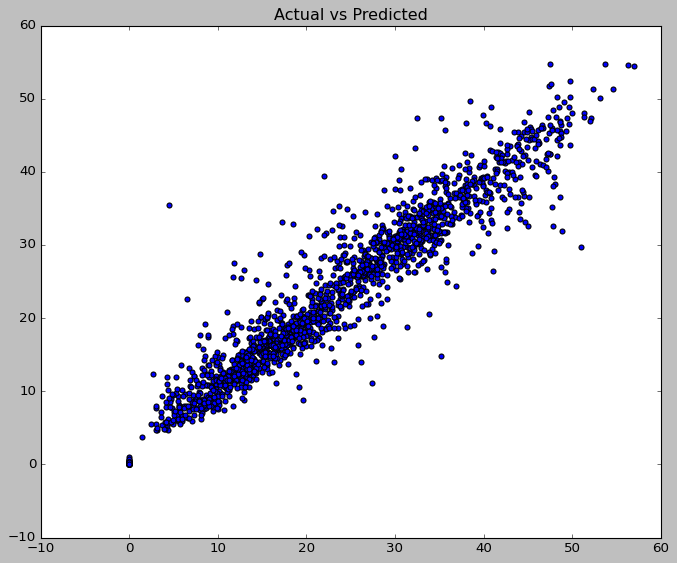

In [65]:
# Plot of Actual vs Predicted values
plt.figure(figsize=(10,8))
plt.title("Actual vs Predicted")
plt.scatter(y_test,predictions)

### The Random Forest model is performing pretty good, As there's a strong correlation between the model's predictions and the actual values.

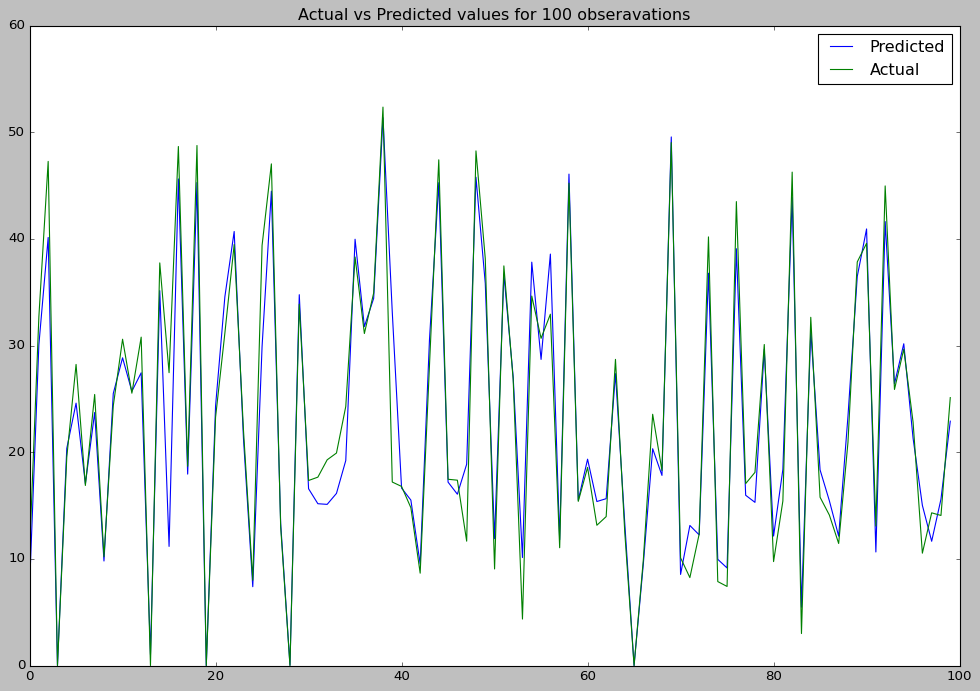

In [66]:
# Plot Actual vs Predictions
plt.figure(figsize=(15,10))
plt.plot(predictions[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(['Predicted','Actual'])
plt.title("Actual vs Predicted values for 100 obseravations")
plt.show()

### From the above plot we can see that the Predicted values are very close to the Actual values and the model is performing pretty good in capturing the underlying patterns in the data 

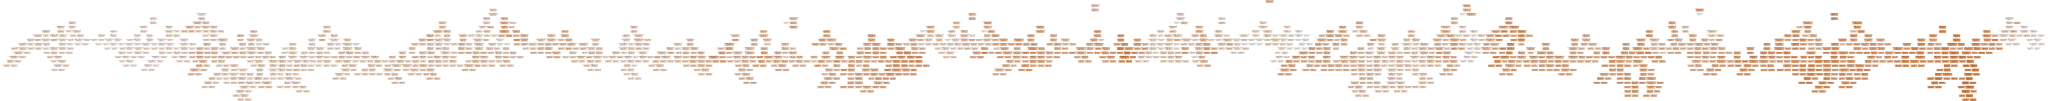

In [67]:
# Visualize a single decision tree from Random forest
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(RFC.estimators_[1],out_file=None,feature_names=x.columns,class_names=['Rented bike count'],filled=True)
graph=graphviz.Source(dot_data)
graph

In [68]:
# Feature importances of Random forest model
RFC.feature_importances_

array([0.2541659 , 0.24843515, 0.09465692, 0.00858059, 0.01128084,
       0.03717493, 0.06515109, 0.00191734, 0.00272288, 0.16590053,
       0.01004516, 0.00100186, 0.01291199, 0.00507563, 0.00163763,
       0.0636863 , 0.00111461, 0.00174432, 0.00429256, 0.00557466,
       0.00096236, 0.00084702, 0.00111973])

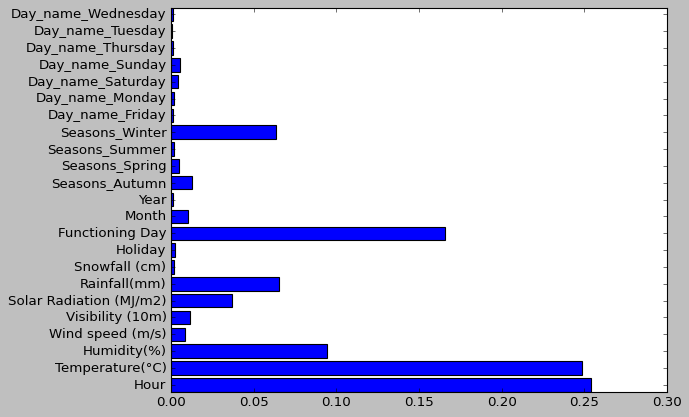

In [75]:
# Bar plot of Feature importances
plt.barh(x.columns,RFC.feature_importances_)
plt.show()

In [70]:
graph.render("Estinmator in Randomforest")
'Estimator in Randomforest.png'

'Estimator in Randomforest.png'

## Shap Values

In [71]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [72]:
# Fits the explainer
explainer = shap.Explainer(RFC.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 1753it [29:01,  1.00it/s]


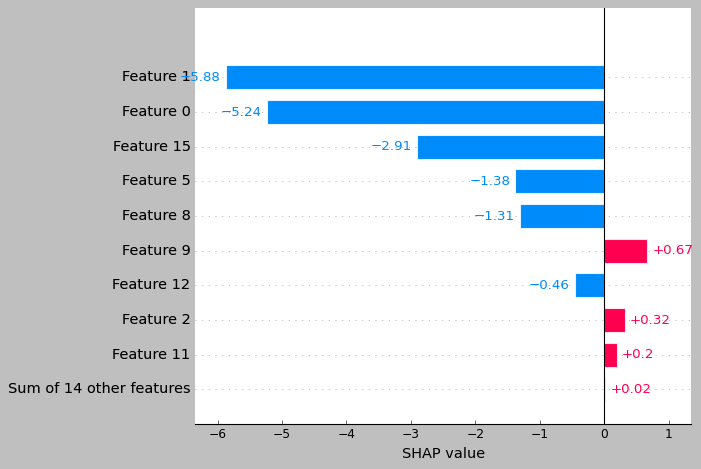

In [73]:
shap.plots.bar(shap_values[0])

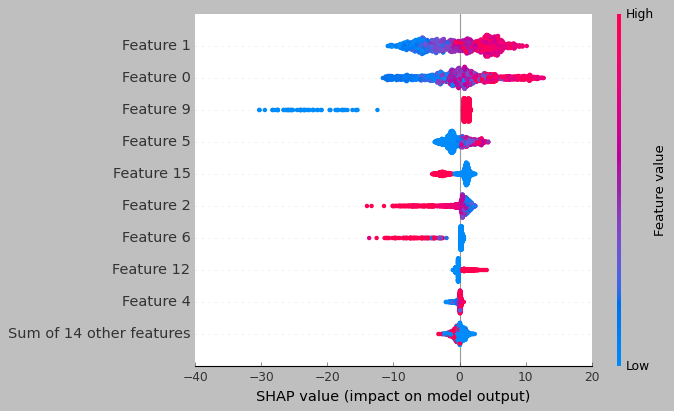

In [74]:
shap.plots.beeswarm(shap_values)

# **Inferences and Conclusion**

## • There is a high demand of bikes on working days. In hourly basis, the bike counts peak in the afternoon (from 15.00 to 20.00). There are two peak occurences, at 8.00 and at 18.00, which is most likely to be caused by workers going to office in the morning and going back home in the evening

## • Demand for the Rented bikes is more during weekdays when compared to weekends. The bike counts peak in the afternoon (from 15.00 to 20.00) when temperature is at highest, with the most visibility, windspeed, and least humidity. 

## • Demand for the rented bikes is high during summer (May ,June and July) and low during winter (December , January and February

## • The demand of bikes will be lower on a rainy day as compared to a sunny day. Similarly, higher Snowfall will cause to lower the demand and vice versa. Therefore people prefer to rent bike when the weather is clear and sunny with no rain and snowfall

## • Based on the analysis we built 5 different models to predict the count of Rented bikes. We made new features such as Day, month and year derived from the dates. All the models performed decently but tree and ensemble models outperformed all the linear models (LinearRegression , Lasso , Ridge)

## • Before hyperparameter tuning the decision tree is overfitting the data. But after hyperparameter tuning we avoided overfitting by tuning the parameters. Decision tree has achieved an R2 Score of 86% based on 6-folds CV.

## • The Best model we got here is Random Forest. We achieved an R2 Score of 91.4% based on 6-folds CV. Finally, it was found that Hour and temperature are the most determining  predictors.